# Introduction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from scipy.stats import pearsonr

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

In [31]:
data = pd.read_csv("/content/diabetes_binary_health_indicators_BRFSS2015.csv")

In [32]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [33]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


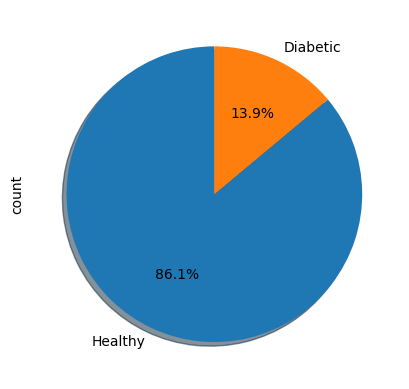

In [34]:
labels = 'Healthy','Diabetic'

data.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

burada göreceğimiz üzere diabetes_binary çok dengesiz bu yüzden modellerin doğruluğunu arttırmak adına veri setini dengelemeye çalışacacğız

In [35]:
df_features = data.drop("Diabetes_binary",axis=1)
df_target = data["Diabetes_binary"]

In [36]:
df_target.value_counts()

,count
Diabetes_binary,
0.0,218334
1.0,35346


In [37]:
nm = NearMiss(version = 1 , n_neighbors = 10)

df_features, df_target = nm.fit_resample(df_features, df_target)

In [38]:
df_features.shape , df_target.shape

((70692, 21), (70692,))

In [39]:
data.duplicated().sum()

np.int64(24206)

In [40]:
data.drop_duplicates(inplace = True)

In [41]:
data.duplicated().sum()

np.int64(0)

In [42]:
threshold = 10

### benzer ifadeler ile öznitelik seçimi

In [44]:
high_score_features_mic = []
feature_scores = mutual_info_classif(df_features, df_target, random_state=0)
for score, f_name in sorted(zip(feature_scores, df_features.columns), reverse=True)[:threshold]:
        high_score_features_mic.append(f_name)

print(high_score_features_mic)

['GenHlth', 'PhysHlth', 'Income', 'DiffWalk', 'MentHlth', 'BMI', 'Education', 'PhysActivity', 'HighBP', 'Veggies']


### Pearson ile öznitelik tahmini

In [45]:
pearson_list = []
for l in list(df_features.columns):
    p,_ = pearsonr(df_features[l], df_target)
    pearson_list.append(abs(p))

p_value=pd.Series(pearson_list,index=df_features.columns)
p_value.sort_values(ascending=False,inplace=True)
high_score_features_pearson = list(p_value.index[:threshold])
print(high_score_features_pearson)

['GenHlth', 'Income', 'DiffWalk', 'PhysHlth', 'Education', 'PhysActivity', 'BMI', 'MentHlth', 'HighBP', 'HeartDiseaseorAttack']


### hem benzerde hem pearsonda bulunanlar

In [46]:
high_score_features = []
for h in  high_score_features_mic:
    if h in high_score_features_pearson:
        high_score_features.append(h)

print(high_score_features)

['GenHlth', 'PhysHlth', 'Income', 'DiffWalk', 'MentHlth', 'BMI', 'Education', 'PhysActivity', 'HighBP']


ayrıca kendi seçimlerimizi de test etmek istedik

In [62]:
y = df_target

features_list = [
    ["all",df_features],

    ["mic 5", df_features[high_score_features_mic[:5]]],
    ["mic 7", df_features[high_score_features_mic[:7]]],
    ["mic 10", df_features[high_score_features_mic]],

    ["pearson 5", df_features[high_score_features_pearson[:5]]],
    ["pearson 7", df_features[high_score_features_pearson[:7]]],
    ["pearson 10", df_features[high_score_features_pearson]],

    ["best 7", df_features[high_score_features]],

    ["choose 3", df_features[['BMI','Age','HighBP']]],
    ["choose 5", df_features[['BMI','Age','HighBP','Smoker','MentHlth']]],
    ["choose 7", df_features[['BMI','Age','HighBP','Smoker','MentHlth', 'PhysHlth','GenHlth']]],

]

# Data Scale

In [63]:
scalar = StandardScaler()
data = []

for name, X in features_list:
    data.append([name, scalar.fit_transform(X)])


In [64]:
splited_data = []
for name, X in data:
    X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)
    splited_data.append({
            'name': name ,'X_train': X_train,
            'X_test':X_test,'y_train':y_train,
            'y_test':y_test
        })

# Modelleme

In [65]:
evaluations = pd.DataFrame()

burada aşama aşama ne çalışıyor ne çalıştırılıyor hangi sürede çalışıyor gözlemlenebilmesi için grafik ekledik ayrıca

In [66]:
data = splited_data[0]
pred_list = []
for data in tqdm(splited_data):
    fs = data["name"]
    models =[
        ['LR', LogisticRegression(), data],
        ['RF', RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced'), data]
    ]

    roc_list = []
    accuracy_list = []
    f1_list = []
    recall_list = []
    precision_list = []

    for name ,model, data in tqdm(models):
        X_train, X_test, y_train, y_test= data['X_train'], data['X_test'], data['y_train'], data['y_test']
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_test)[:,1]

        pred_list.append({
            "model": name,
            "fs": fs,
            "data": y_pred
        })

        roc_list.append(metrics.roc_auc_score(y_test,y_pred))

        y_pred = [0 if (y<0.5)else 1 for y in y_pred]

        accuracy_list.append(metrics.accuracy_score(y_test,y_pred))
        f1_list.append(metrics.f1_score(y_test,y_pred))
        recall_list.append(metrics.recall_score(y_test,y_pred))
        precision_list.append(metrics.precision_score(y_test,y_pred))

    names = [name for name ,_ ,_ in models]
    fsm = [data['name'] for _ ,_ ,data in models]
    evaluation = pd.DataFrame({'classifiers': names,'Feature selection method': fsm ,'AUC Score': roc_list, 'Accuracy':accuracy_list,'Precision':precision_list,'Recall':recall_list, 'F-measure':f1_list})

    evaluations = pd.concat([evaluations, evaluation], ignore_index=True)

    evaluation = evaluation.sort_values(by='AUC Score', ascending=False)
    print(evaluation)

  9%|▉         | 1/11 [00:13<02:18, 13.87s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
0          LR                      all   0.942231  0.877075   0.920821   
1          RF                      all   0.941631  0.870851   0.936377   

     Recall  F-measure  
0  0.823925   0.869683  
1  0.794563   0.859661  



 18%|█▊        | 2/11 [00:22<01:36, 10.69s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                    mic 5   0.921185  0.857412   0.926572   
0          LR                    mic 5   0.917712  0.853829   0.928186   

     Recall  F-measure  
1  0.774851   0.843947  
0  0.765470   0.839011  



 27%|██▋       | 3/11 [00:32<01:24, 10.58s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                    mic 7   0.932844  0.860053   0.920975   
0          LR                    mic 7   0.930387  0.859911   0.907925   

     Recall  F-measure  
1  0.789617   0.850252  
0  0.803018   0.852255  



 36%|███▋      | 4/11 [00:44<01:18, 11.22s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                   mic 10   0.938028  0.869483   0.938231   
0          LR                   mic 10   0.936623  0.869860   0.911287   

     Recall  F-measure  
1  0.789828   0.857657  
0  0.818242   0.862262  



 45%|████▌     | 5/11 [00:54<01:04, 10.67s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                pearson 5   0.915935  0.844163   0.910931   
0          LR                pearson 5   0.911935  0.837986   0.880595   

     Recall  F-measure  
1  0.759268   0.828214  
0  0.778043   0.826149  



 55%|█████▍    | 6/11 [01:05<00:52, 10.57s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                pearson 7   0.928534  0.854253   0.906017   
0          LR                pearson 7   0.924202  0.850387   0.894430   

     Recall  F-measure  
1  0.790630   0.844400  
0  0.794683   0.841611  



 64%|██████▎   | 7/11 [01:17<00:44, 11.07s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF               pearson 10   0.938787  0.866088   0.934426   
0          LR               pearson 10   0.937760  0.866230   0.908063   

     Recall  F-measure  
1  0.788167   0.855087  
0  0.815728   0.859422  



 73%|███████▎  | 8/11 [01:29<00:34, 11.44s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                   best 7   0.937199  0.868022   0.935556   
0          LR                   best 7   0.935409  0.866937   0.909485   

     Recall  F-measure  
1  0.789259   0.856203  
0  0.813696   0.858928  



 82%|████████▏ | 9/11 [01:40<00:22, 11.40s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                 choose 3   0.788103  0.705347   0.719461   
0          LR                 choose 3   0.749953  0.675924   0.677493   

     Recall  F-measure  
1  0.673829   0.695898  
0  0.672321   0.674897  



 91%|█████████ | 10/11 [01:51<00:11, 11.16s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                 choose 5   0.853552  0.764240   0.851368   
0          LR                 choose 5   0.832115  0.750094   0.787435   

     Recall  F-measure  
1  0.639932   0.730661  
0  0.684752   0.732512  



100%|██████████| 11/11 [02:01<00:00, 11.07s/it]

  classifiers Feature selection method  AUC Score  Accuracy  Precision  \
1          RF                 choose 7   0.923456  0.848642   0.937893   
0          LR                 choose 7   0.915531  0.840108   0.886529   

     Recall  F-measure  
1  0.746580   0.831372  
0  0.779885   0.829795  


In [67]:
evaluations = evaluations.sort_values(by='AUC Score', ascending=False, ignore_index=True)
pd.set_option("display.max_rows", None)
evaluations

,classifiers,Feature selection method,AUC Score,Accuracy,Precision,Recall,F-measure
0,LR,all,0.942231,0.877075,0.920821,0.823925,0.869683
1,RF,all,0.941631,0.870851,0.936377,0.794563,0.859661
2,RF,pearson 10,0.938787,0.866088,0.934426,0.788167,0.855087
3,RF,mic 10,0.938028,0.869483,0.938231,0.789828,0.857657
4,LR,pearson 10,0.937760,0.866230,0.908063,0.815728,0.859422
5,RF,best 7,0.937199,0.868022,0.935556,0.789259,0.856203
6,LR,mic 10,0.936623,0.869860,0.911287,0.818242,0.862262
7,LR,best 7,0.935409,0.866937,0.909485,0.813696,0.858928
8,RF,mic 7,0.932844,0.860053,0.920975,0.789617,0.850252
9,LR,mic 7,0.930387,0.859911,0.907925,0.803018,0.852255


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AUC Score'].plot(kind='hist', bins=20, title='AUC Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('classifiers').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='AUC Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AUC Score', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['AUC Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classifiers')):
  _plot_series(series, series_name, i)
  fig.legend(title='classifiers', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('AUC Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classifiers')):
  _plot_series(series, series_name, i)
  fig.legend(title='classifiers', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classifiers')):
  _plot_series(series, series_name, i)
  fig.legend(title='classifiers', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Precision')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classifiers')):
  _plot_series(series, series_name, i)
  fig.legend(title='classifiers', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['AUC Score'].plot(kind='line', figsize=(8, 4), title='AUC Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['classifiers'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='classifiers', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['classifiers'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='AUC Score', y='classifiers', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['classifiers'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Accuracy', y='classifiers', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['classifiers'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Precision', y='classifiers', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## The best model is Random Forest with 10 feature (Pearson)

In [54]:
high_score_features_pearson

['GenHlth',
 'Income',
 'DiffWalk',
 'PhysHlth',
 'Education',
 'PhysActivity',
 'BMI',
 'MentHlth',
 'HighBP',
 'HeartDiseaseorAttack']

In [55]:
classifier = RandomForestClassifier(max_depth=5,n_estimators=1000, class_weight='balanced')
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list(range(len(high_score_features_pearson)))),
    ])

model = Pipeline(steps=[
    ('precprocessor', preprocessor),
    ('classifier', classifier)
])

In [56]:
X = df_features[high_score_features_mic]
y = df_target
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3)

model.fit(X_train, y_train)

Pipeline(steps=[('precprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=1000))])

In [57]:
y_pred = model.predict_proba(X_test)[:,1]
score = metrics.roc_auc_score(y_test,y_pred)
score

np.float64(0.9401561655413969)